Kellie Gadeken <br>
ASTR 3800 <br>
HW # 5 <br>
02.19.2019

In [30]:
# libraries

import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
# function to calculate the signal-to-noise ratio when observing an object in the sky
# all calculations assume 1 hour of observation time

def calculate_SN(target_rate,sky_rate):
    target_time = float(input("Within one hour, how many seconds do you want to spend observing the target? "))
    assert(target_time <= 3600)   # assert that target_time does not exceed 3600 seconds of observing time
    sky_time = 3600 - target_time   # put the remaining observation time to the sky
    
    #target_time = 500  # test
    #sky_time = 100
    
    sky = (sky_rate*sky_time)*(target_time/sky_time) # calculate the number of sky photons seen during the observation time
    #print(sky)
    target = (sky_rate+target_rate)*target_time   # calculate the number of target photons seen during the observation time
    #print(target)
    
    sky_unc = (np.sqrt(sky_time*sky_rate)*(target_time/sky_time))  # calculate photon uncertainty
    #print(sky_unc)
    target_unc = np.sqrt(target)    # calculate photon uncertainty 
    #print(target_unc)
    
    signal = target - sky      # target - sky photons of actual object
    #print(signal)
    noise = np.sqrt((target_unc**2)+(sky_unc**2))  # the unc for the actual object
    #print(noise)
    
    SN = signal/noise   # the signal-to-noise ratio
    print(f"The S/N ratio is {SN:.2f}, or {SN*100:.2f}%")
    #return SN

In [13]:
target_rate = 10   # target rate, cts/s
sky_rate = 2       # sky rate, cts/s

calculate_SN(target_rate,sky_rate)

Within one hour, how many seconds do you want to spend observing the target? 1
The S/N ratio is 2.89, or 288.67%


In [14]:
calculate_SN(target_rate,sky_rate)

Within one hour, how many seconds do you want to spend observing the target? 1800
The S/N ratio is 113.39, or 11338.93%


In [15]:
calculate_SN(target_rate,sky_rate)

Within one hour, how many seconds do you want to spend observing the target? 2400
The S/N ratio is 122.47, or 12247.45%


In [18]:
calculate_SN(target_rate,sky_rate)

Within one hour, how many seconds do you want to spend observing the target? 3599
The S/N ratio is 7.07, or 706.52%


In [23]:
# slightly modified function to make running it through a loop simpler (see plot below)

def calculate_SN_loop(target_time_loop,target_rate,sky_rate):
    target_time = float(target_time_loop)
    assert(target_time <= 3600)   # assert that target_time does not exceed 3600 seconds of observing time
    sky_time = 3600 - target_time   # put the remaining observation time to the sky
    
    sky = (sky_rate*sky_time)*(target_time/sky_time) # calculate the number of sky photons seen during the observation time
    #print(sky)
    target = (sky_rate+target_rate)*target_time   # calculate the number of target photons seen during the observation time
    #print(target)
    
    sky_unc = (np.sqrt(sky_time*sky_rate)*(target_time/sky_time))  # calculate photon uncertainty
    #print(sky_unc)
    target_unc = np.sqrt(target)    # calculate photon uncertainty 
    #print(target_unc)
    
    signal = target - sky      # target - sky photons of actual object
    #print(signal)
    noise = np.sqrt((target_unc**2)+(sky_unc**2))  # the unc for the actual object
    #print(noise)
    
    SN = signal/noise   # the signal-to-noise ratio
    return SN

C:\Users\Kellie\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


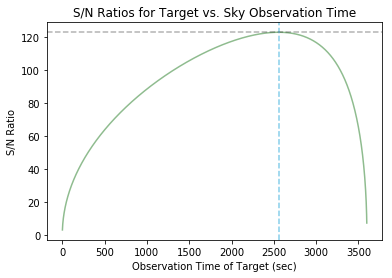

For optimal S/N ratio, observe the target for 2556 seconds, and observe the sky for 1044 seconds. 
This is about 71% target time and 29% sky time.


In [43]:
# plot S/N for every option of time on target vs. time on background

def plot_SN(target_rate,sky_rate):

    SN_list = []

    for i in np.arange(3600):
        SN = calculate_SN_loop(i,target_rate,sky_rate)  
        SN_list.append(SN)
    SN_array = np.array(SN_list)
    SN_array0 = [x for x in SN_array if (math.isnan(x) == False)]  # remove nan value(s)
    #print(len(SN_array0))

    optimal_obs_time = SN_list.index(max(SN_array0))   # the maximum time to observe target for optimal S/N
    #print(optimal_obs_time)

    plt.plot(SN_array, c='darkseagreen')
    plt.axvline(optimal_obs_time,linestyle='--',c='skyblue')   # plot location of optimal target observation time
    plt.axhline(np.max(SN_array0),linestyle='--',c='k',alpha=0.3) # plot horizontal line for maximum S/N ratio percentage
    plt.title("S/N Ratios for Target vs. Sky Observation Time")
    plt.ylabel("S/N Ratio")
    plt.xlabel("Observation Time of Target (sec)")
    plt.show()

    print(f"For optimal S/N ratio, observe the target for {optimal_obs_time} seconds, and observe the sky for {(3600-optimal_obs_time)} seconds. \nThis is about {round((optimal_obs_time/3600)*100)}% target time and {round(((3600-optimal_obs_time)/3600)*100)}% sky time.")

plot_SN(target_rate,sky_rate)

C:\Users\Kellie\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


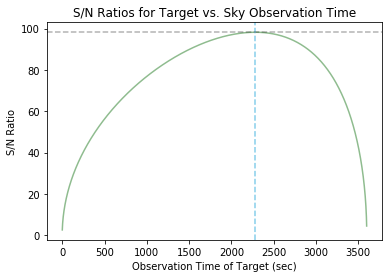

For optimal S/N ratio, observe the target for 2282 seconds, and observe the sky for 1318 seconds. 
This is about 63% target time and 37% sky time.


In [44]:
# show results for a different sky rate

sky_rate_new = 5  # new sky rate, cts/sec

plot_SN(target_rate,sky_rate_new)